# *Features* Deep Learning Model

## The Data

For this notebook, I will use the CSV file "features_3_sec" given with the dataset. It contains features of each song (split into 3 seconds audio files)such as zero crossing and amplitude envelope.

## Objective

We are just trying to create a model off the preprocessed data given, and see how much accuracy we can get off that

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('Data/features_3_sec.csv')
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

Checking for the length of the different files we have

In [4]:
df['length'].value_counts()

66149    9990
Name: length, dtype: int64

In [5]:
genres = list(df['label'].value_counts().index)
genres

['jazz',
 'pop',
 'metal',
 'reggae',
 'blues',
 'disco',
 'rock',
 'classical',
 'hiphop',
 'country']

Changing the labels into something the model can understand

In [6]:
df['genre'] = df['label'].apply(lambda x: genres.index(x))

In [7]:
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label,genre
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues,4
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues,4
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues,4
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues,4
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues,4


In [8]:
df = df.drop(['filename', 'length', 'label'],axis=1)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X = df.drop('genre',axis=1).values
y = df['genre'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
X_train.shape

(7492, 57)

In [15]:
X_train.max()

25.81825789326572

In [16]:
X_train.min()

-15.6417207579802

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))


model.compile(optimizer=Adam(learning_rate=0.002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.build(X_train.shape)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  14848     
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  32896     
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  8256      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  6

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
stop = EarlyStopping(monitor='val_loss', patience=5)

model.fit(X_train, y_train, batch_size=64, epochs=350, validation_data=(X_test, y_test)) # , callbacks=[stop]

Epoch 1/350
118/118 [==============================] - 1s 4ms/step - loss: 1.9860 - accuracy: 0.2859 - val_loss: 1.3669 - val_accuracy: 0.5128
Epoch 2/350
118/118 [==============================] - 0s 3ms/step - loss: 1.5152 - accuracy: 0.4629 - val_loss: 1.1293 - val_accuracy: 0.6189
Epoch 3/350
118/118 [==============================] - 0s 3ms/step - loss: 1.3608 - accuracy: 0.5219 - val_loss: 1.0359 - val_accuracy: 0.6665
Epoch 4/350
118/118 [==============================] - 0s 3ms/step - loss: 1.2282 - accuracy: 0.5697 - val_loss: 0.9194 - val_accuracy: 0.6982
Epoch 5/350
118/118 [==============================] - 0s 3ms/step - loss: 1.1598 - accuracy: 0.6041 - val_loss: 0.8825 - val_accuracy: 0.7102
Epoch 6/350
118/118 [==============================] - 0s 3ms/step - loss: 1.1102 - accuracy: 0.6321 - val_loss: 0.8251 - val_accuracy: 0.7234
Epoch 7/350
118/118 [==============================] - 0s 3ms/step - loss: 1.0534 - accuracy: 0.6466 - val_loss: 0.7797 - val_accuracy: 0.7430

Epoch 58/350
118/118 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.8488 - val_loss: 0.4011 - val_accuracy: 0.8779
Epoch 59/350
118/118 [==============================] - 0s 4ms/step - loss: 0.4849 - accuracy: 0.8461 - val_loss: 0.4067 - val_accuracy: 0.8703
Epoch 60/350
118/118 [==============================] - 0s 3ms/step - loss: 0.4608 - accuracy: 0.8526 - val_loss: 0.3982 - val_accuracy: 0.8775
Epoch 61/350
118/118 [==============================] - 1s 4ms/step - loss: 0.4838 - accuracy: 0.8517 - val_loss: 0.4125 - val_accuracy: 0.8703
Epoch 62/350
118/118 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8494 - val_loss: 0.4210 - val_accuracy: 0.8691
Epoch 63/350
118/118 [==============================] - 0s 4ms/step - loss: 0.4613 - accuracy: 0.8564 - val_loss: 0.4022 - val_accuracy: 0.8703
Epoch 64/350
118/118 [==============================] - 0s 3ms/step - loss: 0.4644 - accuracy: 0.8474 - val_loss: 0.4058 - val_accuracy:

Epoch 115/350
118/118 [==============================] - 1s 5ms/step - loss: 0.3744 - accuracy: 0.8847 - val_loss: 0.3782 - val_accuracy: 0.8847
Epoch 116/350
118/118 [==============================] - 0s 4ms/step - loss: 0.3885 - accuracy: 0.8797 - val_loss: 0.3794 - val_accuracy: 0.8919
Epoch 117/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3757 - accuracy: 0.8807 - val_loss: 0.3860 - val_accuracy: 0.8879
Epoch 118/350
118/118 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8875 - val_loss: 0.4001 - val_accuracy: 0.8871
Epoch 119/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3652 - accuracy: 0.8819 - val_loss: 0.3812 - val_accuracy: 0.8867
Epoch 120/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3768 - accuracy: 0.8817 - val_loss: 0.3695 - val_accuracy: 0.8851
Epoch 121/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3951 - accuracy: 0.8797 - val_loss: 0.3819 - val_ac

118/118 [==============================] - 0s 3ms/step - loss: 0.2761 - accuracy: 0.9162 - val_loss: 0.3818 - val_accuracy: 0.8987
Epoch 228/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9107 - val_loss: 0.3602 - val_accuracy: 0.9031
Epoch 229/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2727 - accuracy: 0.9130 - val_loss: 0.3879 - val_accuracy: 0.8967
Epoch 230/350
118/118 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.9095 - val_loss: 0.3606 - val_accuracy: 0.8995
Epoch 231/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2987 - accuracy: 0.9079 - val_loss: 0.3595 - val_accuracy: 0.9015
Epoch 232/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.9086 - val_loss: 0.3681 - val_accuracy: 0.9043
Epoch 233/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2840 - accuracy: 0.9112 - val_loss: 0.3684 - val_accuracy: 0.9019

118/118 [==============================] - 1s 4ms/step - loss: 0.2446 - accuracy: 0.9243 - val_loss: 0.3614 - val_accuracy: 0.9075
Epoch 340/350
118/118 [==============================] - 0s 4ms/step - loss: 0.2623 - accuracy: 0.9198 - val_loss: 0.3541 - val_accuracy: 0.9059
Epoch 341/350
118/118 [==============================] - 0s 4ms/step - loss: 0.2698 - accuracy: 0.9166 - val_loss: 0.3644 - val_accuracy: 0.9075
Epoch 342/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2635 - accuracy: 0.9172 - val_loss: 0.3538 - val_accuracy: 0.9031
Epoch 343/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2632 - accuracy: 0.9227 - val_loss: 0.3464 - val_accuracy: 0.9067
Epoch 344/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.9187 - val_loss: 0.3536 - val_accuracy: 0.9051
Epoch 345/350
118/118 [==============================] - 0s 3ms/step - loss: 0.2528 - accuracy: 0.9243 - val_loss: 0.3672 - val_accuracy: 0.9051

In [21]:
history = pd.DataFrame(model.history.history)
history.head()

,loss,accuracy,val_loss,val_accuracy
0,1.986042,0.285905,1.366874,0.512810
1,1.515228,0.462894,1.129346,0.618895
2,1.360826,0.521890,1.035881,0.666533
3,1.228184,0.569674,0.919357,0.698159
4,1.159772,0.604111,0.882517,0.710168


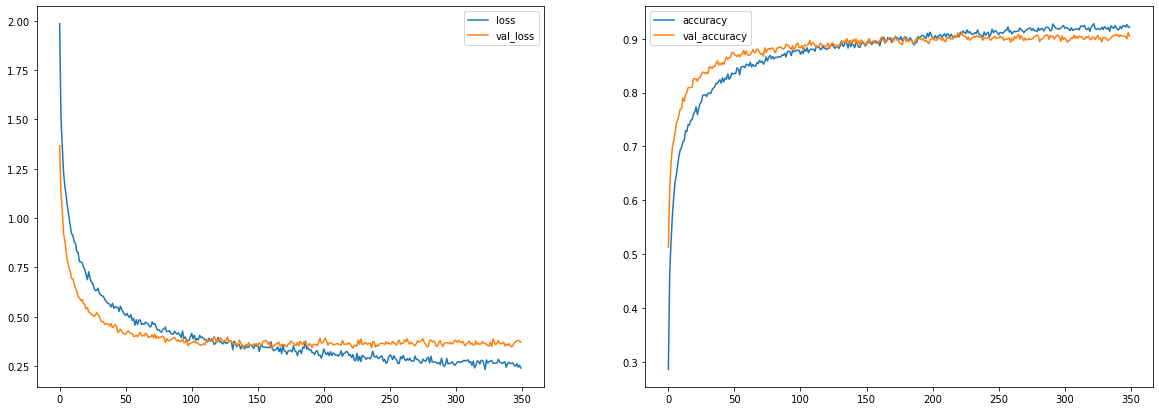

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=2)

history[['loss', 'val_loss']].plot(ax=axes[0], figsize=(20,7))
history[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [23]:
from sklearn.metrics import classification_report,confusion_matrix

In [24]:
pred = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


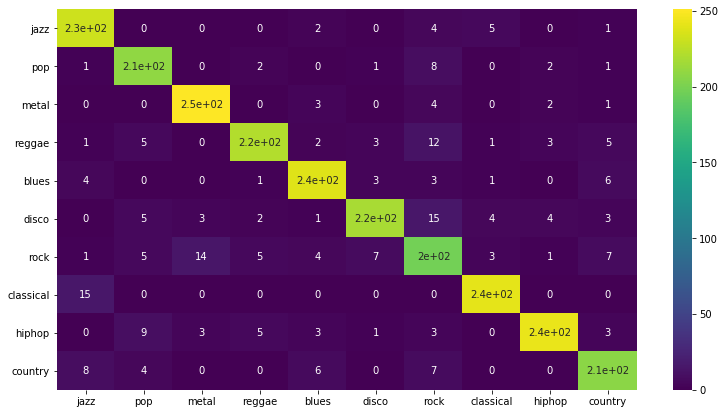

In [25]:
matrix = confusion_matrix(y_test,pred)

plt.figure(figsize=(13,7))
sns.heatmap(matrix, cmap="viridis", annot=True, xticklabels = genres, yticklabels=genres)

In [26]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       244
           1       0.88      0.93      0.91       224
           2       0.93      0.96      0.94       261
           3       0.94      0.87      0.90       254
           4       0.92      0.93      0.92       257
           5       0.94      0.85      0.89       255
           6       0.78      0.81      0.79       245
           7       0.95      0.94      0.94       256
           8       0.95      0.90      0.93       270
           9       0.88      0.89      0.89       232

    accuracy                           0.90      2498
   macro avg       0.90      0.90      0.90      2498
weighted avg       0.91      0.90      0.90      2498



**Great! We were able to obtain an accuracy of 92% on our training data and 90% on our validation data, which is very good**